# Credit Card Fraud Classification - Toby Liang

## I. Import Essential Libraries

In [1]:
# Arrays and dataframes
import numpy as np
import pandas as pd

# Visualization libraries
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

## II. Introducing the Data

In [2]:
# Import the data
path = "./data/credit_card.csv"
dataset = pd.read_csv(path)

# Renaming columns
columns = []
for col in dataset.columns:
    columns.append(col.lower())
columns[-1] = "label"
dataset.columns = columns

# Shape of dataset
print("Number of examples: {}\nNumber of variables: {}".format(dataset.shape[0], dataset.shape[1]))

# Printing first 5 rows
dataset.head()

Number of examples: 284807
Number of variables: 31


,time,v1,v2,v3,v4,v5,v6,v7,v8,v9,...,v21,v22,v23,v24,v25,v26,v27,v28,amount,label
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


We have 284,807 examples with 31 columns.

## III. Exploratory Data Analysis, Data Cleaning, and Data Transformation
1. Variable identification
2. Univariate analysis
3. Bivariate analysis
4. Missing values imputation
5. Duplicate removal
6. Outlier treatment
7. Variable transformation
8. Variable creation

### 1. Variable Identification

In [3]:
# Splitting features and labels
features = dataset.drop("label", axis = 1)
labels = dataset["label"]

# Checking for number of unique labels
print("Unique Labels: {}\n".format(labels.unique()))

# Check if features are all continuous (float64)
print("Feature Datatypes: \n{}".format(features.dtypes.value_counts()))

Unique Labels: [0 1]

Feature Datatypes: 
float64    30
dtype: int64


There are two unique labels in the dataset, meaning that this is a binary classification problem.  All 30 features are continuous numerical with a datatype of float64.

### 2. Univariate Analysis

In [4]:
# Feature description
features.describe().round(2)

,time,v1,v2,v3,v4,v5,v6,v7,v8,v9,...,v20,v21,v22,v23,v24,v25,v26,v27,v28,amount
count,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,...,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00
mean,94813.86,0.00,0.00,-0.00,0.00,0.00,0.00,-0.00,0.00,-0.00,...,0.00,0.00,-0.00,0.00,0.00,0.00,0.00,-0.00,-0.00,88.35
std,47488.15,1.96,1.65,1.52,1.42,1.38,1.33,1.24,1.19,1.10,...,0.77,0.73,0.73,0.62,0.61,0.52,0.48,0.40,0.33,250.12
min,0.00,-56.41,-72.72,-48.33,-5.68,-113.74,-26.16,-43.56,-73.22,-13.43,...,-54.50,-34.83,-10.93,-44.81,-2.84,-10.30,-2.60,-22.57,-15.43,0.00
25%,54201.50,-0.92,-0.60,-0.89,-0.85,-0.69,-0.77,-0.55,-0.21,-0.64,...,-0.21,-0.23,-0.54,-0.16,-0.35,-0.32,-0.33,-0.07,-0.05,5.60
50%,84692.00,0.02,0.07,0.18,-0.02,-0.05,-0.27,0.04,0.02,-0.05,...,-0.06,-0.03,0.01,-0.01,0.04,0.02,-0.05,0.00,0.01,22.00
75%,139320.50,1.32,0.80,1.03,0.74,0.61,0.40,0.57,0.33,0.60,...,0.13,0.19,0.53,0.15,0.44,0.35,0.24,0.09,0.08,77.16
max,172792.00,2.45,22.06,9.38,16.88,34.80,73.30,120.59,20.01,15.59,...,39.42,27.20,10.50,22.53,4.58,7.52,3.52,31.61,33.85,25691.16


In [5]:
# Label counts
print(labels.value_counts())

0    284315
1       492
Name: label, dtype: int64


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


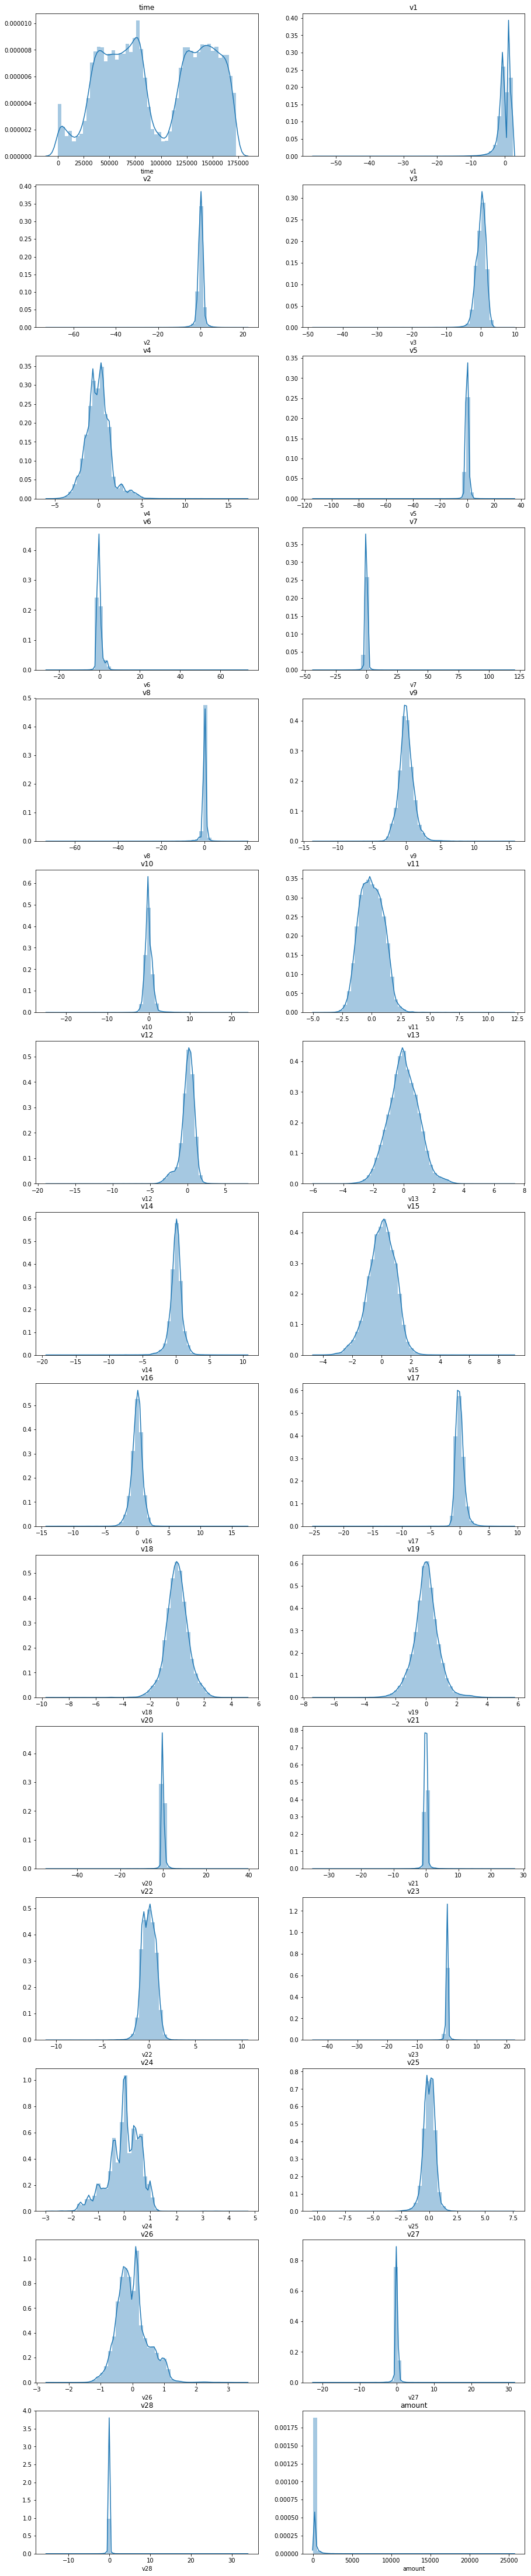

In [40]:
# Plot histograms
hist_data = dataset.dtypes == "float64"
fig = plt.figure(figsize=(15, 80))
plot_i = 1
for col in dataset.columns:
    if (hist_data[col]):
        ax = fig.add_subplot(15, 2, plot_i)
        ax.set_title(col)
        sns.distplot(dataset[col], ax = ax)
        plot_i += 1
plt.show()

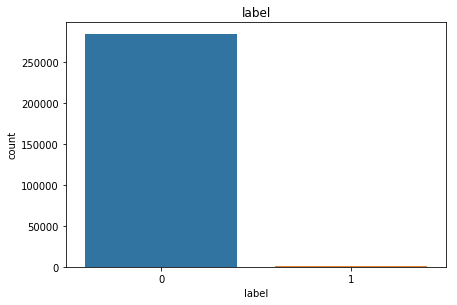

In [7]:
# Plot countplots
count_data = dataset.dtypes == "int64"
fig = plt.figure(figsize=(15, 80))
plot_i = 1
for col in dataset.columns:
    if (count_data[col]):
        ax = fig.add_subplot(15, 2, plot_i)
        ax.set_title(col)
        sns.countplot(dataset[col], ax = ax)
        plot_i += 1
plt.show()

In this dataset, there are significantly more nonfradulent data, making this an imbalanced dataset.  Though most of the data has a mean of 0 (except for time, amount, and label), the standard deviation is not 1.  Thus, the data is not already standardized.  Additionally, the data includes values that are extremely far from the mean, especially in v6 and v7.

### 3. Bivariate Analysis

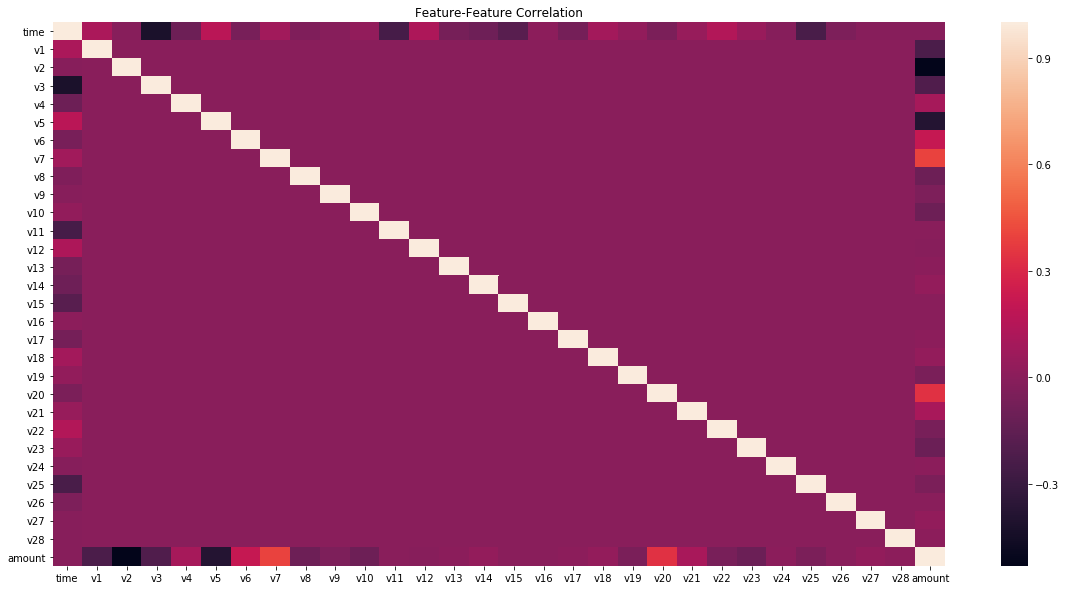

In [8]:
# Feature-feature correlation heatmap
plt.figure(figsize=(20, 10))
plt.title("Feature-Feature Correlation")
sns.heatmap(features.corr())
plt.show()

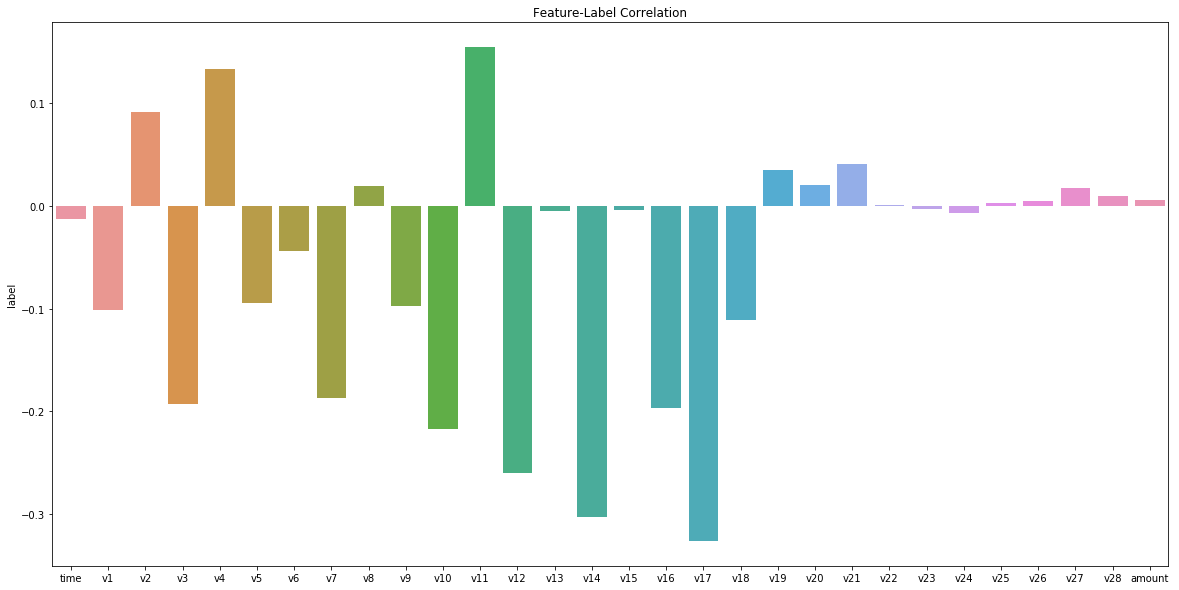

In [9]:
# Feature-label correlation barplot
plt.figure(figsize=(20, 10))
plt.title("Feature-Label Correlation")
sns.barplot(features.columns, dataset.corr()["label"].iloc[:-1])
plt.show()

All of the PCA transformed variables have a near zero correlation to each other.  Additionally, many features have a very low correlaton to the labels including v22-v26, v13, and v15.  Time also has a small negative correlation and surprisingly, amount also has a small correlation.  Features with large magnitudes of correlation include v17, v14, v12, v10, v16, v11, and v3.

### 4. Missing Values Imputation

In [10]:
# Checking for NaN values
has_nan_vars = []
for var, nan_count in (dataset.isnull().sum()).items():
    if (nan_count != 0):
        has_nan_vars.append({var: nan_count})
        
# Checking for 0 values
has_zero_vars = []
for var, zero_count in ((dataset == 0).astype(int).sum()).items():
    if(zero_count != 0):
        has_zero_vars.append({var: zero_count})
        
print("Variables with NaN values: {}".format(has_nan_vars))
print("Variables with zero values: {}".format(has_zero_vars))

Variables with NaN values: []
Variables with zero values: [{'time': 2}, {'amount': 1825}, {'label': 284315}]


In [11]:
# Count entries that have a 0 value for amount and is fraudulent
print("Fraudulent zero amount count: {}".format(((dataset.amount == 0).astype(int) & (dataset.label == 1)).sum()))

# Count entries that have a 0 value for amount and is not fraudulent
print("Non-fraudulent zero amount count: {}".format(((dataset.amount == 0).astype(int) & (dataset.label == 0)).sum()))

Fraudulent zero amount count: 27
Non-fraudulent zero amount count: 1798


No features have NaN values.  The only features that have zero values are time and amount.  Time is the amount of time in seconds after the first transaction which can be zero if the transactions occur at the same time.  Amount is the amount of money involved in a transaction.  27 entries have a 0 transaction amount and is fraudulent.

In [12]:
# Remove 0 amount transactions
copy_dataset = dataset.drop(dataset[dataset["amount"] == 0].index)
mean = copy_dataset["amount"].mean()
dataset["amount"].mask(dataset["amount"] == 0, mean, inplace=True)

# Sanity check
print("Zero amount count: {}".format(((dataset.amount == 0).astype(int)).sum()))

Zero amount count: 0


### 5. Duplicate Removal

In [13]:
# Checking for duplicate rows
dataset.duplicated().value_counts()

False    283726
True       1081
dtype: int64

There are 1081 duplicate rows in the dataset.  These duplicates will have to be dropped so that there are no duplicates in the test set.

In [14]:
# Drop duplicates (Do not want duplicates in test set)
dataset.drop_duplicates(inplace=True)

# Duplicate drop sanity check
print("Duplicates: {}".format(dataset.duplicated().sum()))

Duplicates: 0


### 6. Outlier Treatment

In [43]:
# Find interquartile range
q1 = dataset.quantile(0.25)
q3 = dataset.quantile(0.75)
iqr = q3 - q1

# Consolidate dataset indexes
dataset.reset_index(drop=True, inplace=True)

# Detect outliers
outlier_index = dataset[(dataset < q1 - 1.5 * iqr) | (dataset > q3 + 1.5 * iqr)].dropna(how="all").index
outliers = dataset.iloc[outlier_index.to_list()]

In [44]:
outliers["label"].value_counts()

0    136773
1       473
Name: label, dtype: int64

There exists 136,773 outliers that are nonfraudulent data and 473 outliers that are fraudulent data.

## IV. Data Transformation

In [17]:
from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split

# Split features and labels
features = dataset.drop("label", axis=1)
labels = dataset[["label"]]

# Standardize data
features[features.columns] = scale(features[features.columns])

# Split data into train and test sets
train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size = 0.1)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:9: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  if __name__ == '__main__':


In [18]:
from sklearn.utils import resample

def oversample(train_features, train_labels):
    # Concatenate features and labels for train set
    train_dataset = pd.concat([train_features, train_labels], axis = 1)
    
    # Get non_fraud and fraud data
    not_fraud_dataset = train_dataset[train_dataset.label == 0]
    fraud_dataset = train_dataset[train_dataset.label == 1]
    
    # Oversample fraud
    fraud_oversampled = resample(fraud_dataset, replace = True, n_samples = len(not_fraud_dataset))
    
    # Concatenate oversampled fraud with non_fraud
    train_dataset_oversampled = pd.concat([fraud_oversampled, not_fraud_dataset])
    
    # Split features and labels
    train_features_oversampled = train_dataset_oversampled.drop("label", axis=1)
    train_labels_oversampled = train_dataset_oversampled[["label"]]
    
    # Sanity check
    print(train_labels_oversampled["label"].value_counts())
    
    return (train_features_oversampled, train_labels_oversampled)